# Latent Dirichlet Allocation 

In this jupyter notebook we will followi the tutorial found online about LDA implementation

In [1]:
from xploration_functions import *
import pandas as pd
import csv
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
file = 'Data/2-1_cleaned_corpus_rapports.csv'
corpus = pd.read_csv(file, sep=";")

In [3]:
corpus

,id,rapport
0,2006_627,425093222 prgh 74052207 446315 3/14/1998 12:00...
1,2006_220,656225945 yc 76593195 2774375 01/19/2003 12:00...
2,2006_540,356529973 fih 2102647 14892/3n8v 481088 7/9/19...
3,2006_486,677168937 rwh 9049156 280494 763694 11/05/2001...
4,2006_535,405728860 fih 7150860 05849/1xpu 994032 1/3/19...
...,...,...
6901,2018-2_182040,know lastname know firstname 3441 unit numeric...
6902,2018-2_176106,know lastname 2170 know firstname unit numeric...
6903,2018-2_130153,know lastname 6066 know firstname unit numeric...
6904,2018-2_109527,admission date 2183 - 8 - 31 discharge date 21...


In [4]:
corpus_list = corpus['rapport'].tolist()

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [6]:
# tokenizer = RegexpTokenizer(r'\w+')

tfidf = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1))

train_data = tfidf.fit_transform(corpus_list)
vocabulary = tfidf.vocabulary_
len(vocabulary)

78302

In [7]:
k = 4
lda = LatentDirichletAllocation(n_components = k)

In [8]:
lda.fit_transform(train_data)

array([[0.01726115, 0.95067647, 0.01603153, 0.01603085],
       [0.94445434, 0.01925417, 0.01814596, 0.01814552],
       [0.0204978 , 0.94208255, 0.01870824, 0.01871141],
       ...,
       [0.49379159, 0.4510028 , 0.0276031 , 0.0276025 ],
       [0.95653291, 0.01548019, 0.01399356, 0.01399334],
       [0.64128771, 0.33395646, 0.01237805, 0.01237778]])

In [9]:
lda_components = lda.components_
terms = tfidf.get_feature_names_out()

for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:7]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['po', 'mg', 'qd', 'tablet', 'discharge', 'override', 'pt']
Topic 1:  ['patient', 'mg', 'history', 'day', 'discharge', 'right', 'admission']
Topic 2:  ['9929488', '151136133', '4656647', '87554035', '94459550', '855934190', '697804']
Topic 3:  ['8723483', 'tlandflent', 'maren', 'uph', 'fih', 'ijordcompmac', 'fairm']


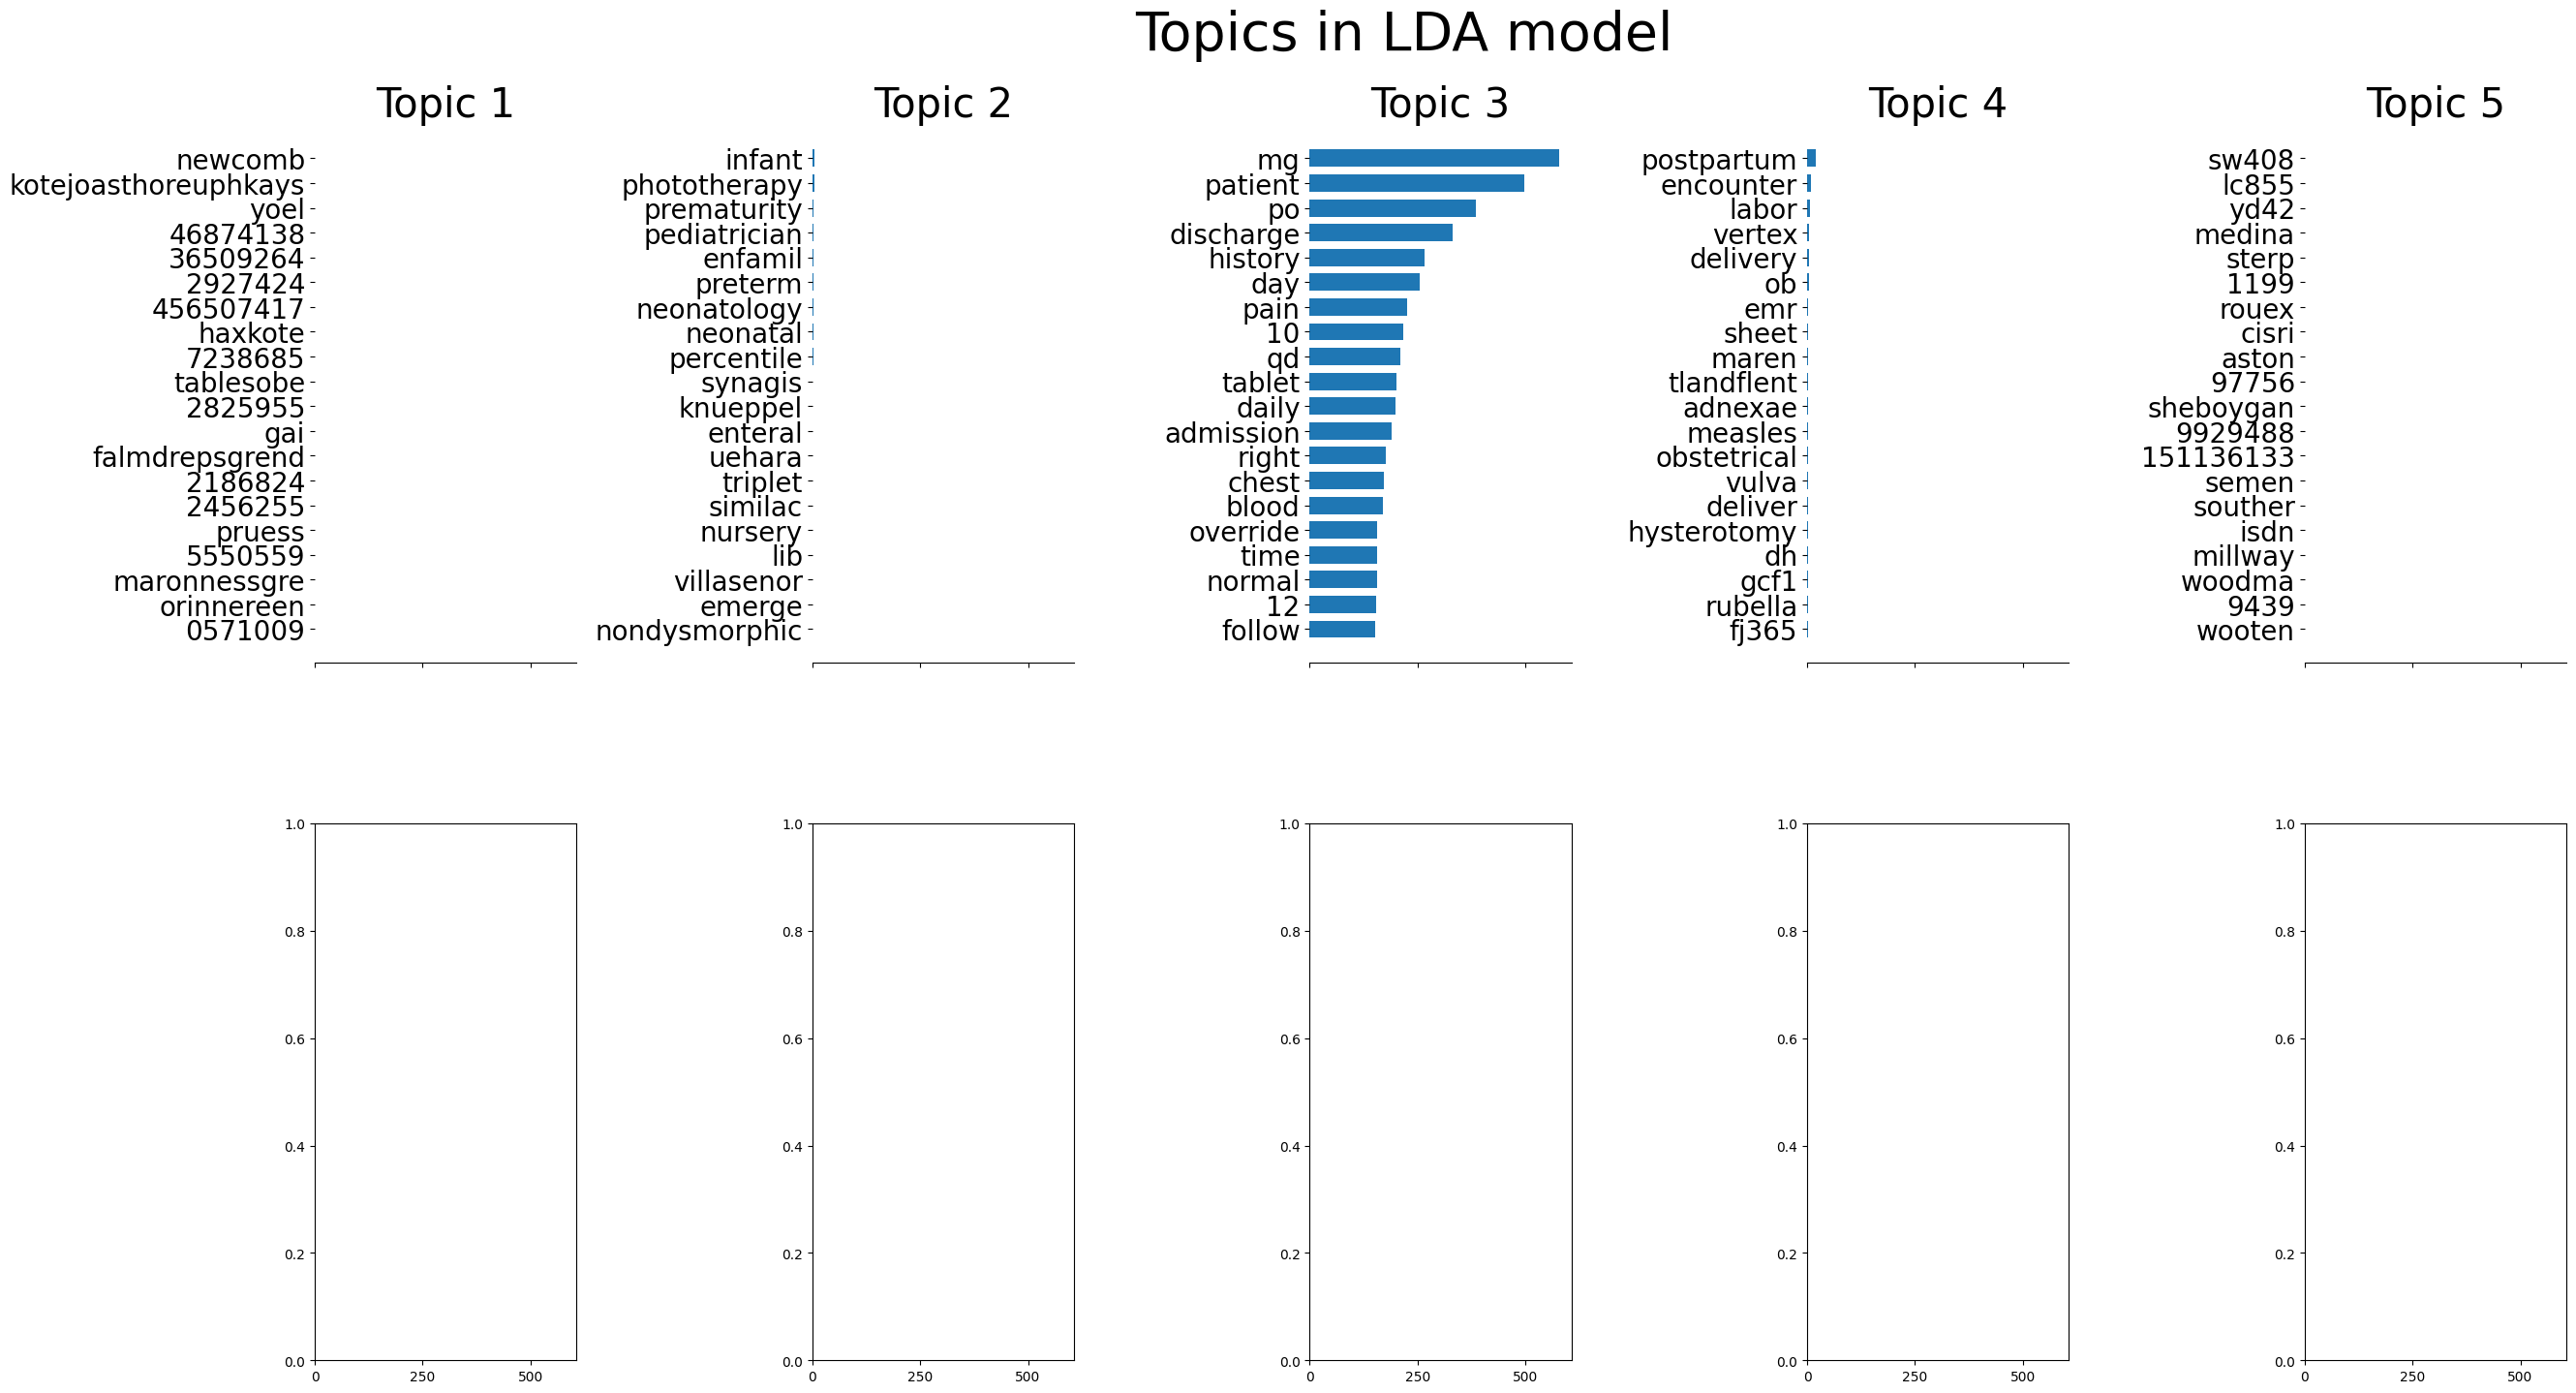

In [51]:
import matplotlib.pyplot as plt

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

terms = tfidf.get_feature_names_out()
plot_top_words(lda, terms, 20, "Topics in LDA model")

# Latent Semantic Analysis

In [52]:
from sklearn.decomposition import TruncatedSVD

In [53]:
num_components=10

# Create SVD object
lsa = TruncatedSVD(n_components=num_components, n_iter=100, random_state=42)

# Fit SVD model on data
lsa.fit_transform(train_data)

# Get Singular values and Components 
Sigma = lsa.singular_values_ 
V_transpose = lsa.components_.T

In [54]:
terms = tfidf.get_feature_names_out()

for index, component in enumerate(lsa.components_):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:5]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['mg', 'patient', 'po', 'discharge', 'day']
Topic 1:  ['po', 'override', 'interaction', 'qd', 'order']
Topic 2:  ['tablet', 'sig', 'mg', 'po', 'qd']
Topic 3:  ['sig', 'discharge', 'tablet', 'daily', 'patient']
Topic 4:  ['mg', 'daily', 'artery', 'coronary', 'tablet']
Topic 5:  ['discharge', 'tablet', 'artery', 'coronary', 'po']
Topic 6:  ['patient', 'mg', 'qd', 'po', '2005']
Topic 7:  ['dl', 'mg', 'daily', '2005', 'mmol']
Topic 8:  ['postoperative', 'right', 'foot', 'wound', 'left']
Topic 9:  ['postpartum', 'daily', 'normal', 'delivery', 'infant']
